<a href="https://colab.research.google.com/github/MHC-FA23-CS341CV/computer-vision-final-project-aslteam/blob/Ramisa/Ramisa_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Final Project Code
This is the final project notebook file for COMSC 341-CV Computer Vision.
* ***Project Title***:
<font color='MediumSeaGreen'>TODO: Give the project a name!</font>

* ***Project Description***:
<font color='MediumSeaGreen'>TODO: Please include the use instructions and expected behavior of the program.</font>

* ***Team Name***:
<font color='MediumSeaGreen'>TODO: Give your group a name!</font>

* ***Group Members***:
<font color='MediumSeaGreen'>TODO: Please add name and email addresses for each team member.</font>

* ***Credit***: See below for a list of reference code our group uses.
> <font color='MediumSeaGreen'>1. TODO: Add URL or source ...</font>





`ver. 111223`

In [ ]:
# Start Final Project Code here :)

## Face, Smile & Eye Detection on Img


In [5]:
#######  shared by Melody #################

# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2023-11-23 05:39:45--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.02s   

2023-11-23 05:39:45 (9.27 MB/s) - ‘test.jpg’ saved [240458/240458]

--2023-11-23 05:39:45--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

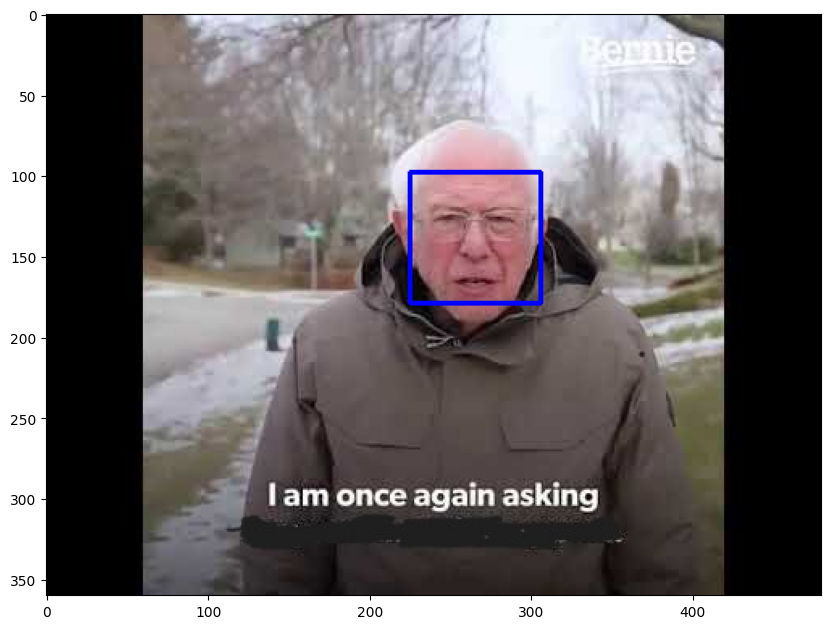

In [18]:
# this is a pre-trained face cascade
test_image = cv2.imread('/content/hqdefault.jpg')
def face_detection(image):
  grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(grey, 1.3, 5)
  for (x,y,w,h) in faces:
      cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

face_detection(test_image)

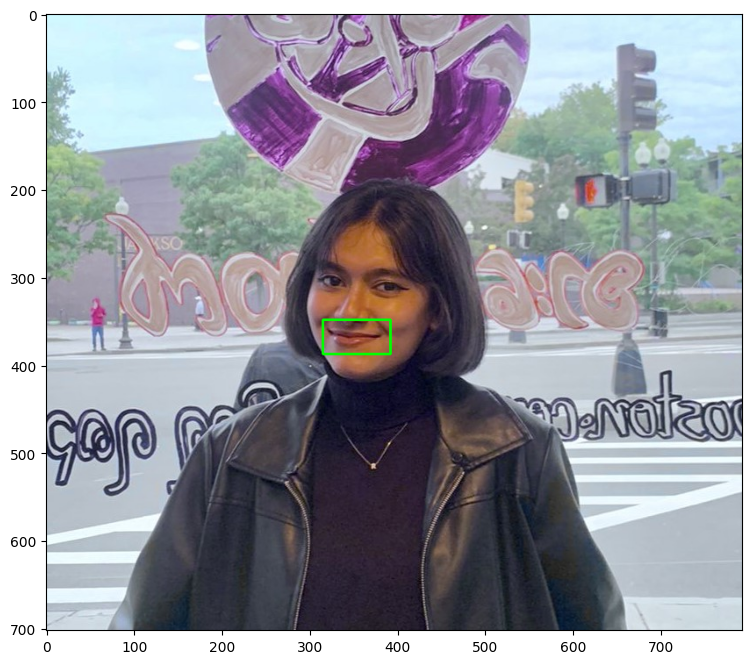

In [14]:
# this is a pre-trained face cascade: this one filtered all the false positives
test_image = cv2.imread('avatar3.jpg')

def smile_detection(image):
  grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(grey, 1.3, 5)
  smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
  smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
  for (x,y,w,h) in faces:
    for (x_s,y_s,w_s,h_s) in smiles:
      if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
        cv2.rectangle(image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


smile_detection(test_image)


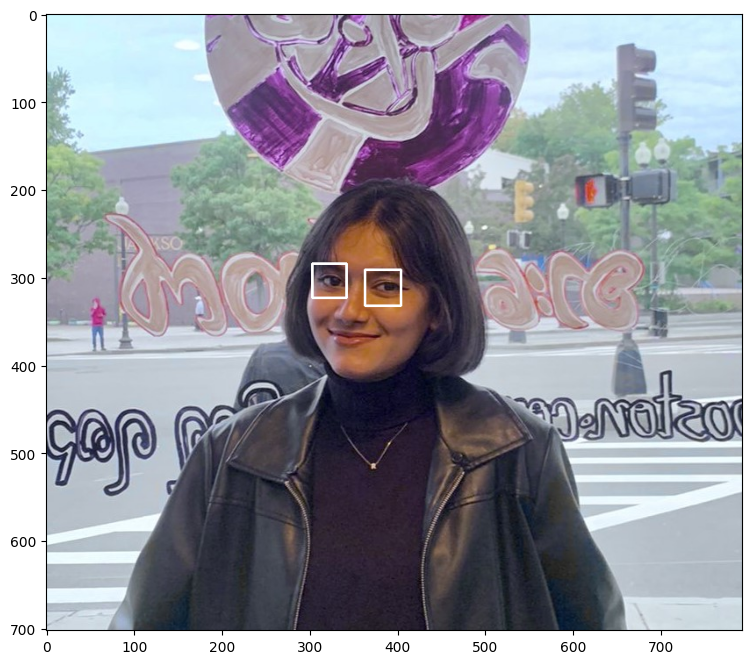

In [19]:
# filtered eye recognition

test_image = cv2.imread('avatar3.jpg')

def eye_detection(image):
  grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(grey, 1.3, 5)
  eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
  eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
  for (x,y,w,h) in faces:
    #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
    for (x_s,y_s,w_s,h_s) in eyes:
      if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
        cv2.rectangle(image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


eye_detection(test_image)

## Hand Detection on Image



#### With Hand Landmarks

In [13]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 37.8 MB/s eta 0:00:00


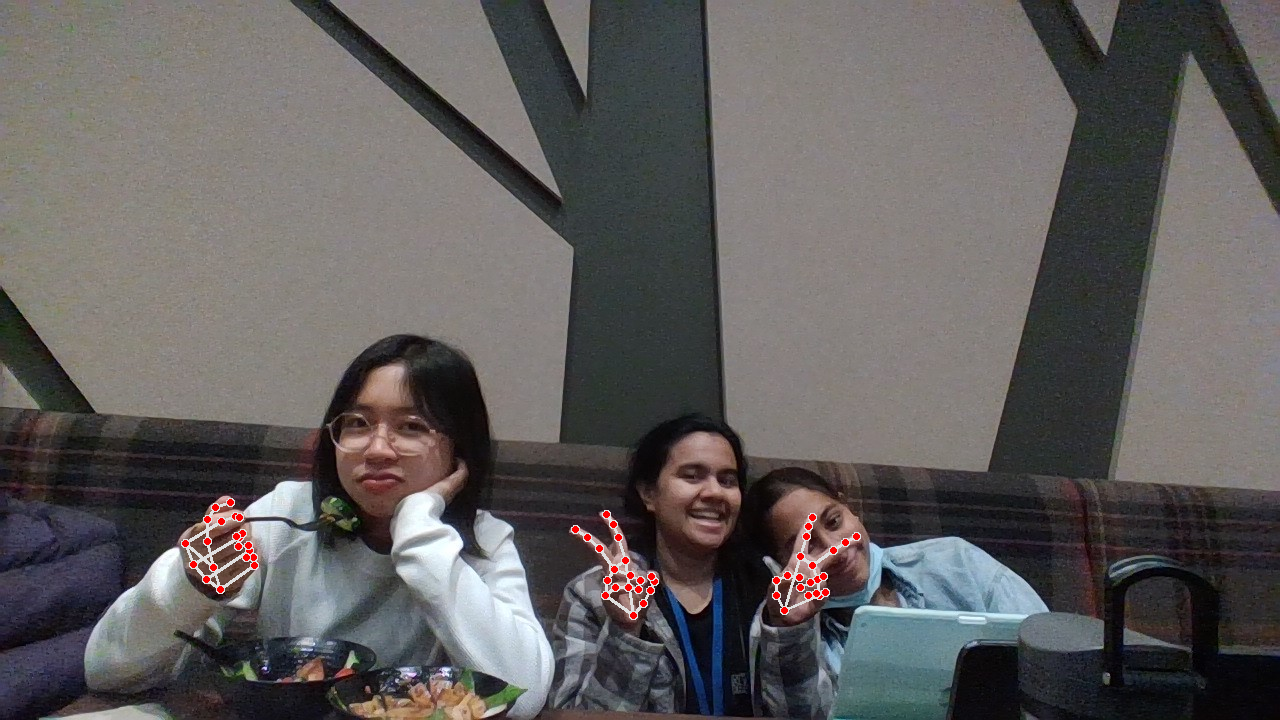

In [16]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

def hand_detection_landmarks(image):

  # Load the MediaPipe Hands model: import hand tracking solution from the MediaPipe library and store
  mp_hands = mp.solutions.hands
  hands = mp_hands.Hands(static_image_mode=True, max_num_hands=10, min_detection_confidence=0.5)

  # Convert the image from BGR to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Process the image and detect hands
  results = hands.process(image)

  # Convert the image back to BGR for drawing
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  # Draw hand landmarks on the image
  if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
          mp.solutions.drawing_utils.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

  # Display the image
  cv2_imshow( image) # cant use cv2.imshow --> will crash

# Load the image
hand_image = cv2.imread('/content/hands_f.jpg')
hand_detection_landmarks(hand_image)

#### Code explanation:

- static_image_mode=True: When set to True, the detection model treats the input images as a batch of static, independent images. This might be useful when you need to detect hands in only one image. When set to False, the model treats images as a video stream1.

- This sets the maximum number of hands that the model will detect. In this case, it’s set to 2, so the model will detect at most 2 hands1.

- This is the minimum confidence value for the hand detection to be considered successful. It’s set to 0.5, meaning detections with confidence below this value will be discarded1.

  ~determines the minimum confidence value for a hand detection to be considered successful.

  If you increase this value, the model will become more strict and only consider detections with a higher confidence as successful. This might result in fewer detections, but those detections are likely to be more accurate.

  On the other hand, if you decrease this value, the model will become less strict and consider detections with a lower confidence as successful. This might result in more detections, but those detections might be less accurate.

#### With Rectangle Surroudning Hands

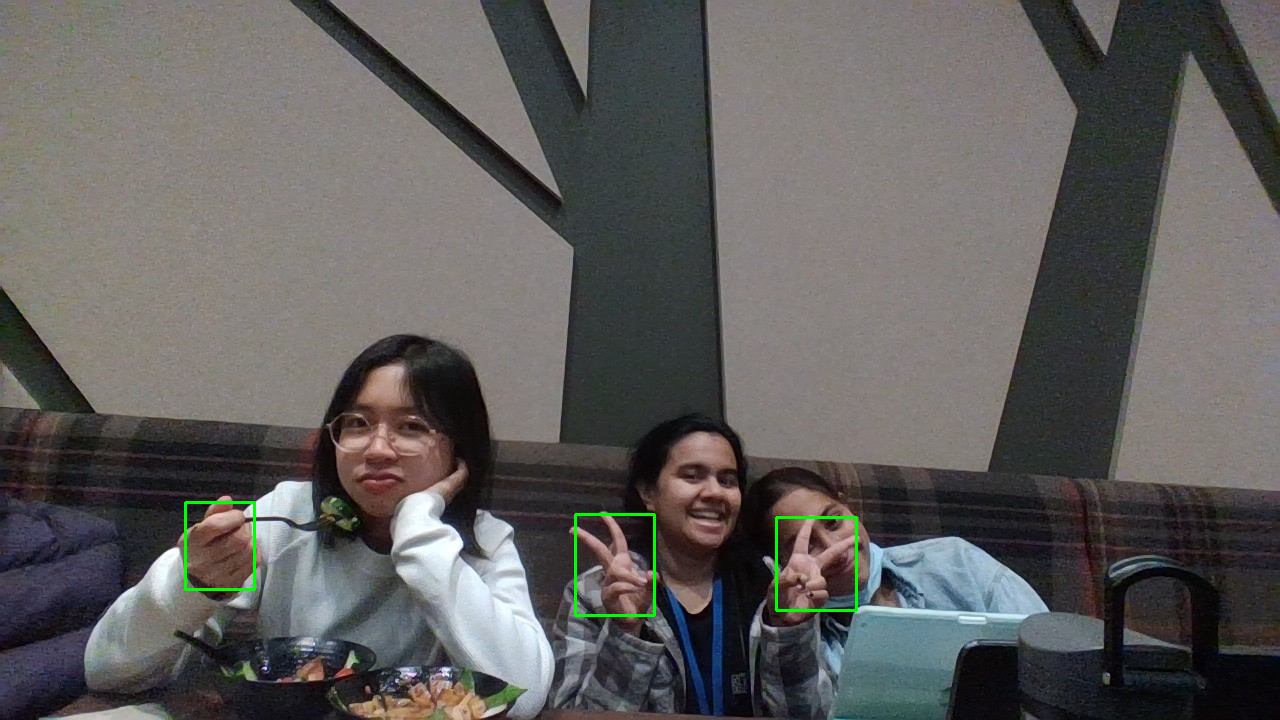

In [18]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

def hand_detection_box(image):
  # Load the MediaPipe Hands model
  mp_hands = mp.solutions.hands
  hands = mp_hands.Hands(static_image_mode=True, max_num_hands=6, min_detection_confidence= 0.5) # changing it from 0.5 to 0.2 -> more hands recognized , 0 -> 6 hands ,

  # Convert the image from BGR to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Process the image and detect hands
  results = hands.process(image)

  # Convert the image back to BGR for drawing
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  # Draw hand landmarks and bounding box on the image
  if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
          # mp.solutions.drawing_utils.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

          # Get the bounding box coordinates
          x_min = min([landmark.x for landmark in hand_landmarks.landmark])
          y_min = min([landmark.y for landmark in hand_landmarks.landmark])
          x_max = max([landmark.x for landmark in hand_landmarks.landmark])
          y_max = max([landmark.y for landmark in hand_landmarks.landmark])

          # Convert the coordinates from relative to absolute
          height, width, _ = image.shape
          x_min = int(x_min * width)
          x_max = int(x_max * width)
          y_min = int(y_min * height)
          y_max = int(y_max * height)

          # Draw the bounding box
          cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

  # Display the image
  cv2_imshow(image)


# Load the image
hand_test_image = cv2.imread('/content/hands_f.jpg')
hand_detection_box(hand_test_image)

# Video Stream Using Webcam


In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [2]:
## HELPER FUNCTIONS ##

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img



# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream

def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [3]:

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)


# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  # image_bytes = b64decode(js_reply['image_data'].split(',')[1])
  image_bytes = b64decode(js_reply['img'].split('base64,')[1])
  # b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert an OpenCV image to an JavaScript object
def image_to_js(img):
  """
  Params:
          img: OpenCV BGR image
  Returns:
          js: JavaScript object containing image for webcam
  """
  # Encode OpenCV BGR image to jpg
  _, jpg = cv2.imencode('.jpg', img)
  # Convert jpg image to bytes
  jpg_as_text = b64encode(jpg)
  # Convert bytes to string
  jpg_as_text = jpg_as_text.decode('utf-8')
  # Create JavaScript object
  js = {'img': 'data:image/jpg;base64,' + jpg_as_text}

  return js


def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))

  return data

def wander_box(count):
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # add a scaredy box
    count+=5
    center = [200,(count)%640]
    bbox_array[center[0]-30:center[0]+30, center[1]-30:center[1]+30,:] = 255
    bbox_array[center[0]-10:center[0], center[1]-20:center[1]-10,:3] = 0 # left eye
    bbox_array[center[0]-10:center[0], center[1]+10:center[1]+20,:3] = 0 # right eye
    return bbox_array, count

## Hand Detection on Live Webcam

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    # Convert the JavaScript object into an OpenCV image
    image = js_to_image(js_reply)

    #create transparent overlay for bounding box
    bbox_array = np.zeros([480, 640, 4], dtype = np.uint8)

    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=6, min_detection_confidence= 0.2) # changing it from 0.5 to 0.2 -> more hands recognized , 0 -> 6 hands ,

    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Process the image and detect hands
    results = hands.process(image)

    # Convert the image back to BGR for drawing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Draw hand landmarks and bounding box on the image
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:

            # Get the bounding box coordinates
            x_min = min([landmark.x for landmark in hand_landmarks.landmark])
            y_min = min([landmark.y for landmark in hand_landmarks.landmark])
            x_max = max([landmark.x for landmark in hand_landmarks.landmark])
            y_max = max([landmark.y for landmark in hand_landmarks.landmark])

            # Convert the coordinates from relative to absolute
            height, width, _ = image.shape
            x_min = int(x_min * width)
            x_max = int(x_max * width)
            y_min = int(y_min * height)
            y_max = int(y_max * height)

          # Draw the bounding box
            bbox_array = cv2.rectangle(bbox_array, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)


    bbox_array[:, :, 3] = (bbox_array.max(axis = 2)> 0).astype(int)*255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes



